<a href="https://colab.research.google.com/github/venkat-nallapu09/prediction-of-SWCC/blob/main/explo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATA PREPARATION**


In [ ]:
import pandas as pd

file_path = "50samples.csv"
data = pd.read_csv(file_path, index_col=False, skiprows=0)

print(data)

    Sample ID  passing_no4   passing_no200  LL  PI  Sat_vol_wc  MAAT
0           1           100           75.0  40  19        9.80  17.0
1           2           100           75.0  39  19        9.60  17.5
2           3           100           76.0  40  19        9.70  17.6
3           4            95           52.0  41  18        7.80  22.0
4           5            95           60.0  42  20        8.20  22.5
5           6            95           58.0  38  18        8.50  22.0
6           7            95           55.0  39  18        8.60  22.3
7           8            95           57.0  40  19        8.70  22.8
8           9            94           53.0  41  19        8.50  22.5
9          10            97           28.0  26  11        4.90  19.8
10         11            97           30.0  27  12        5.00  20.0
11         12            97           33.0  28  11        5.30  19.5
12         13            97           35.0  29  12        5.40  19.7
13         14            97       

In [ ]:
import numpy as np

In [ ]:
data.PI = data.PI.astype(float)

In [ ]:
data.info()
data.describe()

data.columns = data.columns.str.replace(' ', '').str.replace(r'\W', '')
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sample ID      49 non-null     int64  
 1   passing_no4    49 non-null     int64  
 2   passing_no200  49 non-null     float64
 3   LL             49 non-null     int64  
 4   PI             49 non-null     float64
 5   Sat_vol_wc     49 non-null     float64
 6   MAAT           49 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 2.8 KB
Index(['SampleID', 'passing_no4', 'passing_no200', 'LL', 'PI', 'Sat_vol_wc',
       'MAAT'],
      dtype='object')


In [ ]:
# Generate output variables (Fredlund-Xing Parameters)
a_f = 0.00364*(data.passing_no200 * data.PI*0.01)**3.35 + 4*(data.passing_no200*data.PI) + 11
c_f = 0.0514*(data.passing_no200 * data.PI*0.01)**0.465  + 0.5

data['a_f'] = a_f
data['c_f'] = c_f

In [ ]:
data['b_f'] = c_f*(-2.313*(data.passing_no200*data.PI*0.01)**0.14 + 5)
data['h_r'] = a_f * (32.44 * (2.718281)**(0.0186 * data.passing_no200*data.PI*0.01))

data = data.round({
    'passing_no4': 1,
    'passing_no200': 1,
    'sat_vol_wc': 3,
    'MAAT': 1,
    'a_f': 3,
    'b_f': 3,
    'c_f': 3,
    'h_r': 3
    }
)

# Add split column (80% train, 20% validation)
data['split'] = np.where(data['SampleID'] % 5 == 0, 'validation', 'train')

# Ensure physical constraints
data['LL'] = np.maximum(data['LL'], data['PI'] + 1)
data['PI'] = np.maximum(data['PI'], 0)

In [ ]:
data['a_f'] = a_f/1000
data['h_r'] = data['h_r']


data

,SampleID,passing_no4,passing_no200,LL,PI,Sat_vol_wc,MAAT,a_f,c_f,b_f,h_r,split
0,1,100,75.0,40.0,19.0,9.80,17.0,5.737692,0.677,1.113,242.620668,train
1,2,100,75.0,39.0,19.0,9.60,17.5,5.737692,0.677,1.113,242.620668,train
2,3,100,76.0,40.0,19.0,9.70,17.6,5.814903,0.678,1.111,246.756065,train
3,4,95,52.0,41.0,18.0,7.80,22.0,3.761529,0.645,1.185,145.229292,train
4,5,95,60.0,42.0,20.0,8.20,22.5,4.826009,0.663,1.144,195.705708,validation
5,6,95,58.0,38.0,18.0,8.50,22.0,4.196413,0.653,1.167,165.307336,train
6,7,95,55.0,39.0,18.0,8.60,22.3,3.978879,0.649,1.176,155.171713,train
7,8,95,57.0,40.0,19.0,8.70,22.8,4.353644,0.656,1.161,172.749639,train
8,9,94,53.0,41.0,19.0,8.50,22.5,4.047342,0.650,1.173,158.341556,train
9,10,97,28.0,26.0,11.0,4.90,19.8,1.243158,0.587,1.345,42.705805,validation


In [ ]:
data.to_csv("modified_50samples.csv", index=False)


In [ ]:
try:
  df = pd.read_csv('modified_50samples.csv')
  print(df.head())
except FileNotFoundError:
  print("Error: 'plastic_soils_dataset.csv' not found. Please make sure the file exists in the current directory or provide the correct path.")

   SampleID  passing_no4  passing_no200    LL    PI  Sat_vol_wc  MAAT  \
0         1          100           75.0  40.0  19.0         9.8  17.0   
1         2          100           75.0  39.0  19.0         9.6  17.5   
2         3          100           76.0  40.0  19.0         9.7  17.6   
3         4           95           52.0  41.0  18.0         7.8  22.0   
4         5           95           60.0  42.0  20.0         8.2  22.5   

        a_f    c_f    b_f         h_r       split  
0  5.737692  0.677  1.113  242.620668       train  
1  5.737692  0.677  1.113  242.620668       train  
2  5.814903  0.678  1.111  246.756065       train  
3  3.761529  0.645  1.185  145.229292       train  
4  4.826009  0.663  1.144  195.705708  validation  


# **RANDOM FOREST REGRESSOR**

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
try:
  df = pd.read_csv('modified_50samples.csv')
  print(df.head())
except FileNotFoundError:
  print("Error: 'plastic_soils_dataset.csv' not found. Please make sure the file exists in the current directory or provide the correct path.")


   SampleID  passing_no4  passing_no200    LL    PI  Sat_vol_wc  MAAT  \
0         1          100           75.0  40.0  19.0         9.8  17.0   
1         2          100           75.0  39.0  19.0         9.6  17.5   
2         3          100           76.0  40.0  19.0         9.7  17.6   
3         4           95           52.0  41.0  18.0         7.8  22.0   
4         5           95           60.0  42.0  20.0         8.2  22.5   

        a_f    c_f    b_f         h_r       split  
0  5.737692  0.677  1.113  242.620668       train  
1  5.737692  0.677  1.113  242.620668       train  
2  5.814903  0.678  1.111  246.756065       train  
3  3.761529  0.645  1.185  145.229292       train  
4  4.826009  0.663  1.144  195.705708  validation  


In [ ]:


# Define input and output columns
input_cols = ['passing_no4', 'passing_no200', 'LL', 'PI', 'MAAT', 'Sat_vol_wc']
output_cols = ['a_f', 'b_f', 'c_f', 'h_r']

# Split the dataset
train_df = df[df['split'] == 'train']
val_df = df[df['split'] == 'validation']

X_train = train_df[input_cols]
y_train = train_df[output_cols]
X_val = val_df[input_cols]
y_val = val_df[output_cols]

# Train a Random Forest Regressor for each output
models = {}
predictions = {}
metrics = {}

for target in output_cols:
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train[target])
    y_pred = rf.predict(X_val)
    predictions[target] = y_pred
    models[target] = rf
    metrics[target] = {
        'RMSE': np.sqrt(mean_squared_error(y_val[target], y_pred)),
        'R2': r2_score(y_val[target], y_pred)
    }

metrics





{'a_f': {'RMSE': np.float64(0.37002804164752895), 'R2': 0.9345303656051559},
 'b_f': {'RMSE': np.float64(0.017241234487897543), 'R2': 0.94570921100694},
 'c_f': {'RMSE': np.float64(0.0070211189358329335), 'R2': 0.9406300553110496},
 'h_r': {'RMSE': np.float64(17.19764530880775), 'R2': 0.9279727172320342}}

In [ ]:
target

'h_r'

In [ ]:

predictions_df = pd.DataFrame(predictions, index=val_df.index)

results_df = pd.concat([val_df, predictions_df.add_suffix('_pred')], axis=1)


results_df

predictions_df

,a_f,b_f,c_f,h_r
4,3.838401,1.18231,0.64607,149.199465
9,1.509032,1.31793,0.59534,53.055339
14,1.546029,1.31551,0.59619,54.582230
19,2.847268,1.22920,0.62805,104.887541
24,2.616727,1.24308,0.62218,92.737339
29,4.666187,1.14919,0.66061,187.941624
34,5.535620,1.11963,0.67413,231.870786
39,3.663121,1.19019,0.64358,141.285439
44,2.659388,1.24343,0.62191,98.911476


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


# Calculate regression metrics
mse = mean_squared_error(y_val, predictions_df)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, predictions_df)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 73.97406786886012
Root Mean Squared Error (RMSE): 8.600817860463046
R-squared (R2): 0.9372105872887949


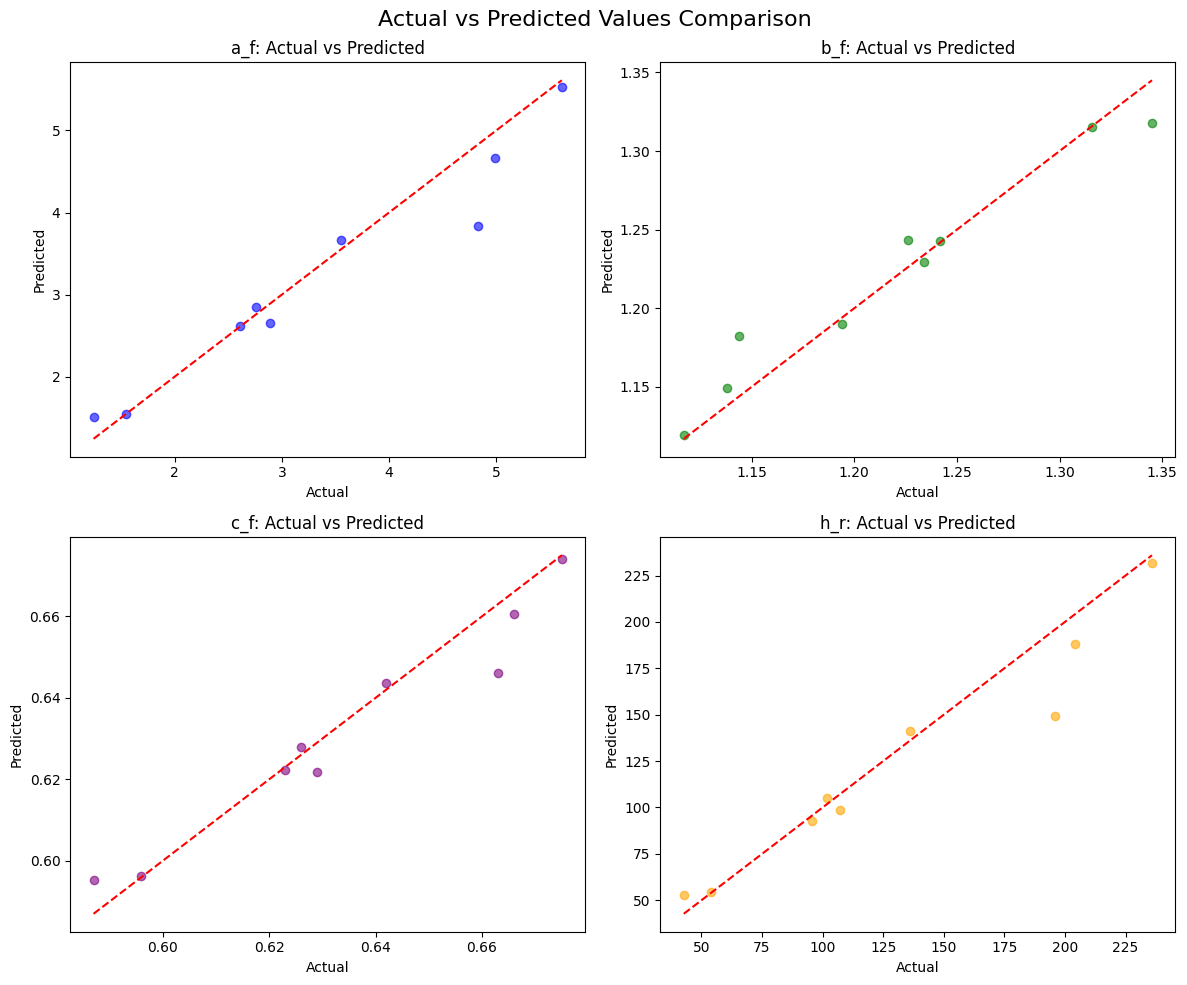

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('results_df.csv')

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Actual vs Predicted Values Comparison', fontsize=16)

# Plot a_f
axes[0,0].scatter(df['a_f'], df['a_f_pred'], color='blue', alpha=0.6)
axes[0,0].plot([df['a_f'].min(), df['a_f'].max()], [df['a_f'].min(), df['a_f'].max()], 'r--')
axes[0,0].set_title('a_f: Actual vs Predicted')
axes[0,0].set_xlabel('Actual')
axes[0,0].set_ylabel('Predicted')

# Plot b_f
axes[0,1].scatter(df['b_f'], df['b_f_pred'], color='green', alpha=0.6)
axes[0,1].plot([df['b_f'].min(), df['b_f'].max()], [df['b_f'].min(), df['b_f'].max()], 'r--')
axes[0,1].set_title('b_f: Actual vs Predicted')
axes[0,1].set_xlabel('Actual')
axes[0,1].set_ylabel('Predicted')

# Plot c_f
axes[1,0].scatter(df['c_f'], df['c_f_pred'], color='purple', alpha=0.6)
axes[1,0].plot([df['c_f'].min(), df['c_f'].max()], [df['c_f'].min(), df['c_f'].max()], 'r--')
axes[1,0].set_title('c_f: Actual vs Predicted')
axes[1,0].set_xlabel('Actual')
axes[1,0].set_ylabel('Predicted')

# Plot h_r
axes[1,1].scatter(df['h_r'], df['h_r_pred'], color='orange', alpha=0.6)
axes[1,1].plot([df['h_r'].min(), df['h_r'].max()], [df['h_r'].min(), df['h_r'].max()], 'r--')
axes[1,1].set_title('h_r: Actual vs Predicted')
axes[1,1].set_xlabel('Actual')
axes[1,1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

In [ ]:
results_df.to_csv("results_df.csv", index=False)

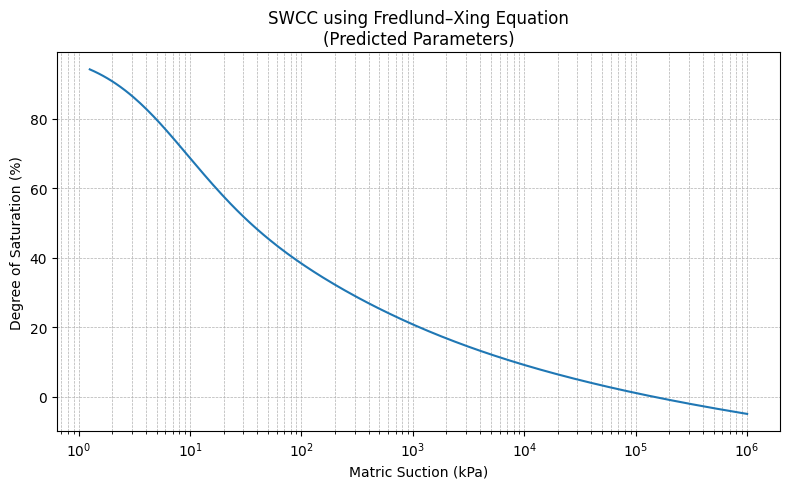

In [ ]:


sample = results_df.iloc[0]


a_f_pred = sample['a_f_pred']
b_f_pred = sample['b_f_pred']
c_f_pred = sample['c_f_pred']
h_r_pred = sample['h_r_pred']

# Define suction range (h in kPa)
h = np.logspace(0.1, 6, 300)  # from ~1 kPa to 1,000,000 kPa

# Fredlund–Xing correction function C(h)
def C(h, h_r_pred):
    return 1 - np.log(1 + h / h_r_pred) / np.log(1 + (1.45e5) / h_r_pred)

# Fredlund–Xing SWCC model
def S(h, a_f_pred, b_f_pred, c_f_pred, h_r_pred):
    return C(h, h_r_pred) * (1 / np.log(np.e + (h / a_f_pred) ** b_f_pred)) ** c_f_pred

# Calculate degree of saturation S(h)
S_h = S(h, a_f_pred, b_f_pred, c_f_pred, h_r_pred)

# Plotting
plt.figure(figsize=(8, 5))
plt.semilogx(h, S_h * 100)  # S in percent
plt.xlabel('Matric Suction (kPa)')
plt.ylabel('Degree of Saturation (%)')
plt.title('SWCC using Fredlund–Xing Equation\n(Predicted Parameters)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


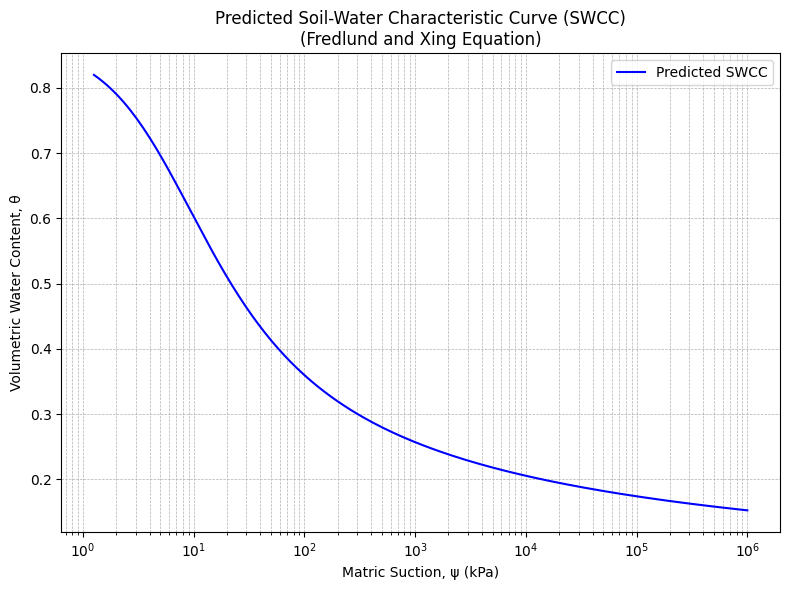

In [ ]:
# Define the Fredlund and Xing equation
def fredlund_xing(psi, a, b, c, h_r, theta_s=0.4):
    term1 = np.log(np.e + (psi / a) ** b)
    term2 = np.log(np.e + (h_r / a) ** b)
    return theta_s * (np.log(np.e + 1) * (term1 / term2)) ** (-c)

# Suction values (psi) in kPa
psi = np.logspace(0.1, 6, 200)  # from ~1 kPa to 1,000,000 kPa

# Use predicted parameters from the first row
params = df.iloc[0]
theta_pred = fredlund_xing(
    psi,
    a=params['a_f_pred'],
    b=params['b_f_pred'],
    c=params['c_f_pred'],
    h_r=params['h_r_pred']
)

# Plot the predicted SWCC
plt.figure(figsize=(8, 6))
plt.semilogx(psi, theta_pred, label='Predicted SWCC', color='blue')
plt.xlabel('Matric Suction, ψ (kPa)')
plt.ylabel('Volumetric Water Content, θ')
plt.title('Predicted Soil-Water Characteristic Curve (SWCC)\n(Fredlund and Xing Equation)')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()
plt.show()


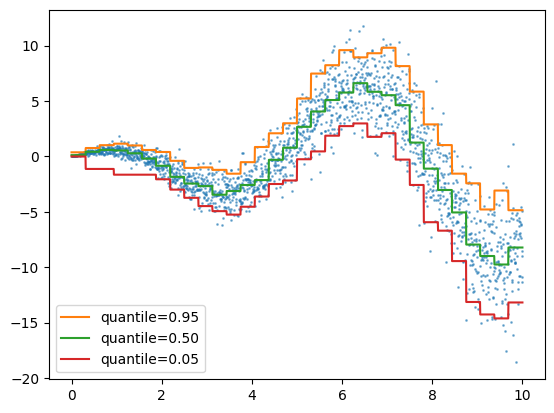

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

# Simple regression function for X * cos(X)
rng = np.random.RandomState(42)
X_1d = np.linspace(0, 10, num=2000)
X = X_1d.reshape(-1, 1)
y = X_1d * np.cos(X_1d) + rng.normal(scale=X_1d / 3)

quantiles = [0.95, 0.5, 0.05]
parameters = dict(loss="quantile", max_bins=32, max_iter=50)
hist_quantiles = {
    f"quantile={quantile:.2f}": HistGradientBoostingRegressor(
        **parameters, quantile=quantile
    ).fit(X, y)
    for quantile in quantiles
}

fig, ax = plt.subplots()
ax.plot(X_1d, y, "o", alpha=0.5, markersize=1)
for quantile, hist in hist_quantiles.items():
    ax.plot(X_1d, hist.predict(X), label=quantile)
_ = ax.legend(loc="lower left")

# hackathon


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# Configuration
CALL_STRIKES = list(range(23500, 26001, 100))
PUT_STRIKES = list(range(22500, 25001, 100))
ALL_STRIKES = sorted(set(CALL_STRIKES + PUT_STRIKES))
CALL_COLS = [f'call_iv_{k}' for k in CALL_STRIKES]
PUT_COLS = [f'put_iv_{k}' for k in PUT_STRIKES]
IV_COLS = CALL_COLS + PUT_COLS
FEATURE_COLS = [f'X{i}' for i in range(42)]


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Secure permissions

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from scipy.interpolate import CubicSpline

In [ ]:
train_df = pd.read_parquet('/content/data/train_data.parquet')
test_df = pd.read_parquet('/content/data/test_data.parquet')

In [ ]:

# Configuration
CALL_STRIKES = list(range(23500, 26001, 100))
PUT_STRIKES = list(range(22500, 25001, 100))
ALL_STRIKES = sorted(set(CALL_STRIKES + PUT_STRIKES))
CALL_COLS = [f'call_iv_{k}' for k in CALL_STRIKES]
PUT_COLS = [f'put_iv_{k}' for k in PUT_STRIKES]
IV_COLS = CALL_COLS + PUT_COLS
FEATURE_COLS = [f'X{i}' for i in range(42)]



In [ ]:
# 1. Data Feature Engineering (Applied after loading)
# Ensure 'timestamp' is datetime type
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])

# Create temporal features
train_df['dow'] = train_df['timestamp'].dt.dayofweek
train_df['hour'] = train_df['timestamp'].dt.hour
train_df['minute'] = train_df['timestamp'].dt.minute

test_df['dow'] = test_df['timestamp'].dt.dayofweek
test_df['hour'] = test_df['timestamp'].dt.hour
test_df['minute'] = test_df['timestamp'].dt.minute

# Rename the dataframes back to 'train' and 'test' if that is the user's intention for subsequent cells
# Based on later code, it seems the user uses 'train' and 'test'
train = train_df
test = test_df

In [ ]:
# 2. Handle missing expiry in test data
def predict_time_to_expiry(train, test):
    """Predict TTE using temporal and anonymized features"""
    # Prepare training data
    # Check if 'expiry' column exists in train before attempting to convert to datetime
    if 'expiry' in train.columns:
      train['tte'] = (pd.to_datetime(train['expiry']) - train['timestamp']).dt.total_seconds() / 86400
    else:
        # Handle the case where 'expiry' is missing, perhaps by setting a default or raising an error
        # For now, we'll assume it exists based on the traceback
        pass # Or add error handling if necessary

    # Feature engineering for TTE prediction
    tte_features = ['dow', 'hour', 'minute', 'underlying'] + FEATURE_COLS

    # Time-series cross-validation for TTE prediction
    tscv = TimeSeriesSplit(n_splits=5)
    train['pred_tte'] = np.nan
    models = []

    # Import the early stopping callback
    from lightgbm.callback import early_stopping

    for fold, (train_idx, val_idx) in enumerate(tscv.split(train)):
        X_train = train.iloc[train_idx][tte_features]
        y_train = train.iloc[train_idx]['tte']
        X_val = train.iloc[val_idx][tte_features]

        model = lgb.LGBMRegressor(
            n_estimators=1000,
            learning_rate=0.05,
            num_leaves=63,
            random_state=42
        )

        # Use early_stopping_callback instead of early_stopping_rounds
        # Pass a list of callbacks to the 'callbacks' argument
        model.fit(X_train, y_train,
                  eval_set=[(X_val, train.iloc[val_idx]['tte'])],
                  callbacks=[early_stopping(stopping_rounds=50, verbose=False)]) # verbose=False to match original verbose=0

        train.loc[val_idx, 'pred_tte'] = model.predict(X_val)
        models.append(model)

    # Predict TTE for test data using ensemble
    test_preds = np.zeros(len(test))
    for model in models:
        test_preds += model.predict(test[tte_features]) / len(models)
    test['pred_tte'] = test_preds

    # For training, use OOF predictions to avoid leakage
    train['time_to_expiry'] = train['pred_tte']
    test['time_to_expiry'] = test['pred_tte']

    return train, test

train, test = predict_time_to_expiry(train, test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11037
[LightGBM] [Info] Number of data points in the train set: 29725, number of used features: 46
[LightGBM] [Info] Start training from score 1.386019
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11037
[LightGBM] [Info] Number of data points in the train set: 59448, number of used features: 46
[LightGBM] [Info] Start training from score 2.049465
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11037
[LightGBM] [Info] Number of data points in the train set: 89171, number of used features: 46
[LightGBM] [Info] Start 

In [ ]:
# 3. Volatility Surface Features
def add_surface_features(df):
    # Calculate ATM strike (nearest 100)
    df['atm_strike'] = round(df['underlying'] / 100) * 100

    # Interpolate ATM IV for calls and puts
    for option_type, cols in [('call', CALL_COLS), ('put', PUT_COLS)]:
        atm_ivs = []

        # Filter cols to only include those present in the DataFrame
        available_cols = [col for col in cols if col in df.columns]

        # Check if there are enough available columns for spline
        if len(available_cols) < 4:
            # If not enough columns, fill with NaN and skip interpolation
            df[f'{option_type}_atm_iv'] = np.nan
            continue

        strikes = np.array([int(c.split('_')[-1]) for c in available_cols])

        for idx, row in df.iterrows():
            # Use only the available columns for the row
            valid_mask = ~row[available_cols].isna()
            if valid_mask.sum() < 4:  # Need min 4 points for spline from available columns
                atm_ivs.append(np.nan)
                continue

            try:
                cs = CubicSpline(strikes[valid_mask], row[available_cols].values[valid_mask])
                atm_ivs.append(cs(row['atm_strike']))
            except:
                # Catch potential errors during spline creation/evaluation
                atm_ivs.append(np.nan)

        df[f'{option_type}_atm_iv'] = atm_ivs

    # Add moneyness features - These columns should always be creatable as they only depend on strike and underlying
    for strike in CALL_STRIKES:
        df[f'moneyness_call_{strike}'] = strike / df['underlying']
    for strike in PUT_STRIKES:
        df[f'moneyness_put_{strike}'] = strike / df['underlying']

    return df

train = add_surface_features(train)
test = add_surface_features(test)

In [ ]:
# 4. Data Preparation for Modeling
def prepare_long_format(df):
    records = []
    for _, row in df.iterrows():
        # Process calls
        for strike in CALL_STRIKES:
            col = f'call_iv_{strike}'
            if pd.isna(row[col]):
                continue  # Skip missing targets

            records.append({
                'timestamp': row['timestamp'],
                'strike': strike,
                'moneyness': row[f'moneyness_call_{strike}'],
                'time_to_expiry': row['time_to_expiry'],
                'type': 0,  # 0=call
                'atm_iv': row['call_atm_iv'],
                'iv': row[col],
                **{f'X{i}': row[f'X{i}'] for i in range(42)},
                'dow': row['dow'],
                'hour': row['hour'],
                'minute': row['minute']
            })
             # Process puts
        for strike in PUT_STRIKES:
            col = f'put_iv_{strike}'
            if pd.isna(row[col]):
                continue  # Skip missing targets

            records.append({
                'timestamp': row['timestamp'],
                'strike': strike,
                'moneyness': row[f'moneyness_put_{strike}'],
                'time_to_expiry': row['time_to_expiry'],
                'type': 1,  # 1=put
                'atm_iv': row['put_atm_iv'],
                'iv': row[col],
                **{f'X{i}': row[f'X{i}'] for i in range(42)},
                'dow': row['dow'],
                'hour': row['hour'],
                'minute': row['minute']
            })

    return pd.DataFrame(records)

train_long = prepare_long_format(train)
test_long = prepare_long_format(test)


NameError: name 'train' is not defined

In [ ]:
# 5. Model Training with Feature Selection
features = [
    'moneyness', 'time_to_expiry', 'type', 'atm_iv',
    'dow', 'hour', 'minute'
] + FEATURE_COLS

X = train_long[features]
y = train_long['iv']

# Time-based cross-validation
tscv = TimeSeriesSplit(n_splits=5)
models = []
oof_preds = np.zeros(len(X))

for fold, (train_idx, val_idx) in enumerate(tscv.split(X, y)):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    model = lgb.LGBMRegressor(
        n_estimators=5000,
        learning_rate=0.02,
        num_leaves=127,
        subsample=0.8,
        colsample_bytree=0.7,
        reg_alpha=0.1,
        reg_lambda=0.1,
        random_state=fold
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        early_stopping_rounds=100,
        verbose=100
    )
    models.append(model)
    oof_preds[val_idx] = model.predict(X_val)




In [ ]:
# Calculate OOF RMSE
oof_rmse = np.sqrt(mean_squared_error(y, oof_preds))
print(f"OOF RMSE: {oof_rmse:.6f}")


In [ ]:
# 6. Prediction & Surface Reconstruction
test_preds = np.zeros(len(test_long))
for model in models:
    test_preds += model.predict(test_long[features]) / len(models)
test_long['predicted_iv'] = test_preds

In [ ]:
# Reconstruct surface
def reconstruct_surface(preds_df, test_df):
    reconstructed = test_df.copy()
    # Initialize IV columns with NaNs
    for col in IV_COLS:
        if col not in reconstructed:
            reconstructed[col] = np.nan

In [ ]:
    # Map predictions back to surface
    for option_type in ['call', 'put']:
        type_mask = preds_df['type'] == (0 if option_type == 'call' else 1)
        for strike in CALL_STRIKES if option_type == 'call' else PUT_STRIKES:
            col = f'{option_type}_iv_{strike}'
            # Find matching predictions
            strike_mask = preds_df['strike'] == strike
            pred_subset = preds_df[type_mask & strike_mask]

In [ ]:
            # Merge predictions back to original dataframe
            if not pred_subset.empty:
                merged = reconstructed.merge(
                    pred_subset[['timestamp', 'predicted_iv']],
                    on='timestamp',
                    how='left'
                )
                reconstructed[col] = merged['predicted_iv']

    return reconstructed

submission = reconstruct_surface(test_long, test)
submission.to_parquet('submission.parquet', index=False)

# submission.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('sample_submission.csv')
df

,timestamp,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0,0.280939,0.251731,0.258893,0.214126,0.242149,0.204580,0.232439,0.221294,0.222997,...,0.232334,0.228209,0.161561,0.227301,0.234169,0.249402,0.250422,0.252460,0.182314,0.282229
1,1,0.270276,0.251731,0.258893,0.214126,0.242149,0.204580,0.233548,0.221294,0.222997,...,0.232334,0.228209,0.161561,0.227301,0.234169,0.249402,0.250422,0.252460,0.182314,0.282229
2,2,0.270276,0.251731,0.258893,0.214126,0.214869,0.204580,0.194604,0.221294,0.222997,...,0.194612,0.188052,0.161561,0.227301,0.181346,0.249402,0.190750,0.252460,0.182314,0.282229
3,3,0.241888,0.251731,0.220505,0.214126,0.198602,0.186190,0.194604,0.221294,0.222997,...,0.194612,0.166394,0.161561,0.227301,0.181346,0.172032,0.190750,0.252460,0.182314,0.206107
4,4,0.235328,0.251731,0.222983,0.214126,0.198602,0.186190,0.192603,0.221294,0.222997,...,0.194612,0.166394,0.161561,0.177920,0.181346,0.176000,0.190750,0.252460,0.182314,0.206107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,12060,0.256935,0.233427,0.200428,0.244232,0.207709,0.204163,0.218509,0.186856,0.164156,...,0.218976,0.162583,0.163865,0.177270,0.236897,0.194718,0.176356,0.177716,0.203478,0.255664
12061,12061,0.256935,0.236380,0.226972,0.244232,0.207709,0.200906,0.193655,0.186856,0.164156,...,0.218976,0.162583,0.163865,0.180196,0.177969,0.177923,0.176356,0.180254,0.203478,0.255664
12062,12062,0.256475,0.243817,0.234267,0.221270,0.207709,0.200906,0.193655,0.185088,0.179760,...,0.192306,0.162583,0.179666,0.176916,0.177969,0.177923,0.176356,0.180254,0.201360,0.209940
12063,12063,0.256475,0.239825,0.234267,0.221270,0.207709,0.200906,0.193655,0.190833,0.185851,...,0.192306,0.190933,0.186172,0.176916,0.177969,0.177923,0.176356,0.178806,0.201360,0.209940


In [ ]:
df.columns

Index(['timestamp', 'call_iv_24000', 'call_iv_24100', 'call_iv_24200',
       'call_iv_24300', 'call_iv_24400', 'call_iv_24500', 'call_iv_24600',
       'call_iv_24700', 'call_iv_24800', 'call_iv_24900', 'call_iv_25000',
       'call_iv_25100', 'call_iv_25200', 'call_iv_25300', 'call_iv_25400',
       'call_iv_25500', 'call_iv_25600', 'call_iv_25700', 'call_iv_25800',
       'call_iv_25900', 'call_iv_26000', 'call_iv_26100', 'call_iv_26200',
       'call_iv_26300', 'call_iv_26400', 'call_iv_26500', 'put_iv_23000',
       'put_iv_23100', 'put_iv_23200', 'put_iv_23300', 'put_iv_23400',
       'put_iv_23500', 'put_iv_23600', 'put_iv_23700', 'put_iv_23800',
       'put_iv_23900', 'put_iv_24000', 'put_iv_24100', 'put_iv_24200',
       'put_iv_24300', 'put_iv_24400', 'put_iv_24500', 'put_iv_24600',
       'put_iv_24700', 'put_iv_24800', 'put_iv_24900', 'put_iv_25000',
       'put_iv_25100', 'put_iv_25200', 'put_iv_25300', 'put_iv_25400',
       'put_iv_25500'],
      dtype='object')

In [ ]:
# Define the list of columns you want to modify
columns_to_modify = [
    'call_iv_24000', 'call_iv_24100', 'call_iv_24200',
    'call_iv_24300', 'call_iv_24400', 'call_iv_24500', 'call_iv_24600',
    'call_iv_24700', 'call_iv_24800', 'call_iv_24900', 'call_iv_25000',
    'call_iv_25100', 'call_iv_25200', 'call_iv_25300', 'call_iv_25400',
    'call_iv_25500', 'call_iv_25600', 'call_iv_25700', 'call_iv_25800',
    'call_iv_25900', 'call_iv_26000', 'call_iv_26100', 'call_iv_26200',
    'call_iv_26300', 'call_iv_26400', 'call_iv_26500', 'put_iv_23000',
    'put_iv_23100', 'put_iv_23200', 'put_iv_23300', 'put_iv_23400',
    'put_iv_23500', 'put_iv_23600', 'put_iv_23700', 'put_iv_23800',
    'put_iv_23900', 'put_iv_24000', 'put_iv_24100', 'put_iv_24200',
    'put_iv_24300', 'put_iv_24400', 'put_iv_24500', 'put_iv_24600',
    'put_iv_24700', 'put_iv_24800', 'put_iv_24900', 'put_iv_25000',
    'put_iv_25100', 'put_iv_25200', 'put_iv_25300', 'put_iv_25400',
    'put_iv_25500'
]

# Access the columns using a list and perform the subtraction
df[columns_to_modify] = df[columns_to_modify] + 0.001

In [ ]:
# prompt: after excution of code download the csv file as submission_2.csv

from google.colab import files

# Assuming 'df' is the DataFrame you want to download
# Convert DataFrame to CSV
df.to_csv('submission_6.csv', index=False)

# Download the file
files.download('submission_6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>